In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn import metrics
import seaborn as sns
%matplotlib inline
import warnings;
warnings.filterwarnings('ignore');



# About data set
# This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, 
# the Cleveland database is the only one that has been used by ML researchers to
# this date.The "target" field refers to the presence of heart disease in the patient.
# It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack

# Attribute Information
# 1) age
# 2) sex
# 3) chest pain type (4 values)
# 4) resting blood pressure
# 5) serum cholestoral in mg/dl
# 6)fasting blood sugar > 120 mg/dl
# 7) resting electrocardiographic results (values 0,1,2)
# 8) maximum heart rate achieved
# 9) exercise induced angina
# 10) oldpeak = ST depression induced by exercise relative to rest
# 11)the slope of the peak exercise ST segment
# 12) number of major vessels (0-3) colored by flourosopy
# 13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
# 14) target: 0= less chance of heart attack 1= more chance of heart attack

In [3]:
Heartdata = pd.read_csv('C:\\Users\\Admin\\Desktop\\Data science\\Machine Learning\\Logistic Regression\\Data+Code\\heart.csv')

In [4]:
Heartdata

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
Heartdata.shape

(303, 14)

In [6]:
Heartdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


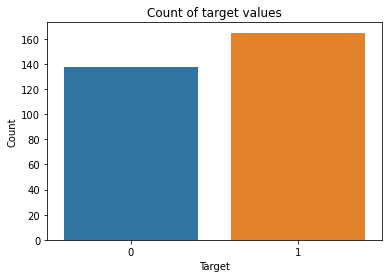

In [56]:
sns.countplot('target',data=Heartdata)
plt.xlabel("Target")
plt.ylabel("Count")
plt.title("Count of target values")
plt.show()

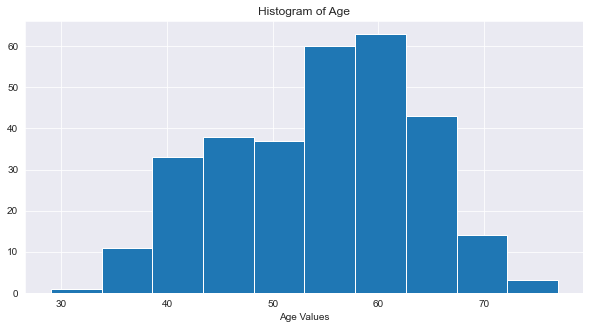

In [65]:
plt.rcParams['figure.figsize'] = [10,5]
sns.set_style('darkgrid')
plt.hist('age',data = Heartdata,histtype='bar')
plt.title("Histogram of Age")
plt.xlabel("Age Values")
plt.show()

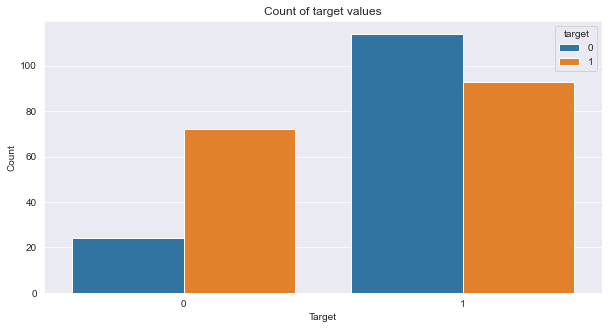

In [66]:
sns.countplot(x = 'sex',hue='target',data=Heartdata)
plt.xlabel("Target")
plt.ylabel("Count")
plt.title("Count of target values")
plt.show()

In [86]:
Heartdata.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [87]:
# checking missing value
Heartdata.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

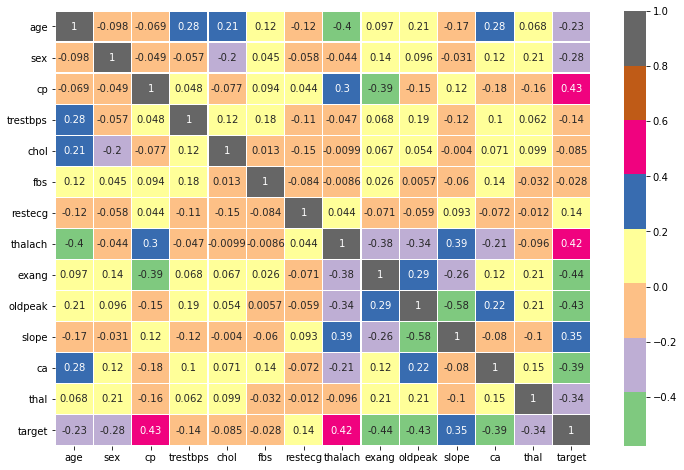

In [88]:
# check correlation 
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(Heartdata.corr(), cmap = "Accent",annot = True,linewidths=.2,ax = ax)
plt.show()

In [23]:
X = Heartdata.iloc[:,0:13].values
Y = Heartdata.iloc[:,13].values 

In [24]:
## standardize the data
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [25]:
Mean = X.mean(axis = 0)
std_dev = X.std(axis = 0)
print('Mean:', Mean[0])
print('std_dev:', std_dev[0])

Mean: 4.6900510611227736e-17
std_dev: 1.0


In [26]:
np.isclose(np.mean(X),0)

True

In [43]:
## Train-test split
X_train,x_test,y_train,y_test = train_test_split(X, Y, test_size = 0.2,random_state = 0)

In [44]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [45]:
y_pred=log_reg.predict(x_test)

In [46]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [47]:
y_test

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [48]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[21,  6],
       [ 3, 31]], dtype=int64)

In [49]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8524590163934426
Precision: 0.8378378378378378
Recall: 0.9117647058823529


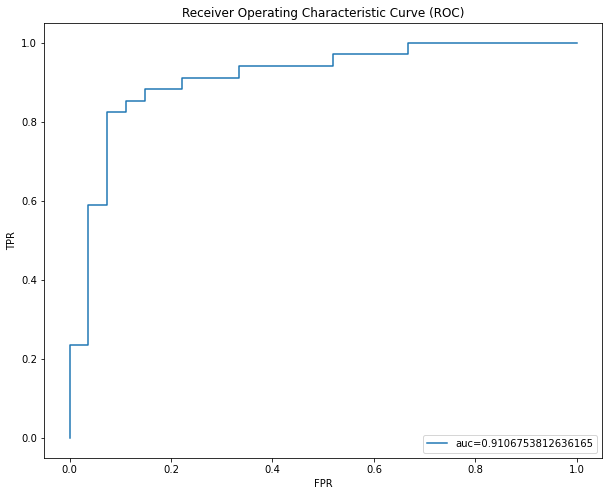

In [51]:
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()